In [31]:
print("hello")

hello


In [32]:
from IPython.display import display, Math, Latex, HTML

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.pretty_print as pprint
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb
import os

gum.config["notebook", "default_graph_size"] = 10

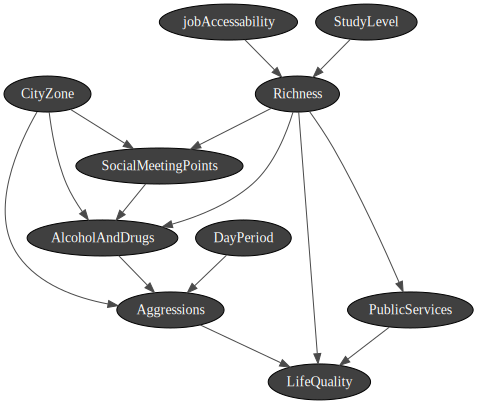

In [33]:
netString = ("AlcoholAndDrugs{high|low}<-CityZone{downtown|suburbs}->Aggressions{high|low};"
             "Richness{high|low}->AlcoholAndDrugs->Aggressions;"
             "DayPeriod{day|night}->Aggressions->LifeQuality{high|low}<-PublicServices{high|low}<-Richness;"
             "jobAccessability{high|low}->Richness<-StudyLevel{high|low};"
             "AlcoholAndDrugs<-SocialMeetingPoints{high|low};Richness->LifeQuality;"
             "Richness->SocialMeetingPoints<-CityZone")
net = gum.fastBN(netString)
gnb.showBN(net)

In [34]:
net.cpt("jobAccessability")[:] = [0.6,0.4]
net.cpt("StudyLevel")[:] = [0.7,0.3]
net.cpt("CityZone")[:] = [0.3,0.7]
net.cpt("DayPeriod")[:] = [0.5,0.5]


net.cpt("Richness")[{'jobAccessability':'high','StudyLevel':'high'}] = [1,0]
net.cpt("Richness")[{'jobAccessability':'high','StudyLevel':'low'}] = [0.8,0.2]
net.cpt("Richness")[{'jobAccessability':'low','StudyLevel':'high'}] = [0.3,0.7]
net.cpt("Richness")[{'jobAccessability':'low','StudyLevel':'low'}] = [0,1]

net.cpt("SocialMeetingPoints")[{'Richness':'high','CityZone':'downtown'}] = [0.6,0.4]
net.cpt("SocialMeetingPoints")[{'Richness':'high','CityZone':'suburbs'}] = [0.8,0.2]
net.cpt("SocialMeetingPoints")[{'Richness':'low','CityZone':'downtown'}] = [0.3,0.7]
net.cpt("SocialMeetingPoints")[{'Richness':'low','CityZone':'suburbs'}] = [0.4,0.6]

net.cpt("AlcoholAndDrugs")[{'Richness':'high','SocialMeetingPoints':'high', 'CityZone':'downtown'}] = [0.6,0.4]
net.cpt("AlcoholAndDrugs")[{'Richness':'high','SocialMeetingPoints':'high', 'CityZone':'suburbs'}] = [0.7,0.3]
net.cpt("AlcoholAndDrugs")[{'Richness':'high','SocialMeetingPoints':'low', 'CityZone':'downtown'}] = [0.3,0.7]
net.cpt("AlcoholAndDrugs")[{'Richness':'high','SocialMeetingPoints':'low', 'CityZone':'suburbs'}] = [0.9,0.1]
net.cpt("AlcoholAndDrugs")[{'Richness':'low','SocialMeetingPoints':'high', 'CityZone':'suburbs'}] = [0.5,0.5]
net.cpt("AlcoholAndDrugs")[{'Richness':'low','SocialMeetingPoints':'high', 'CityZone':'downtown'}] = [0.3,0.7]
net.cpt("AlcoholAndDrugs")[{'Richness':'low','SocialMeetingPoints':'low', 'CityZone':'suburbs'}] = [0.95,0.05]
net.cpt("AlcoholAndDrugs")[{'Richness':'low','SocialMeetingPoints':'low', 'CityZone':'downtown'}] = [0.95,0.05]

net.cpt("Aggressions")[{'CityZone':'downtown','AlcoholAndDrugs':'high', 'DayPeriod':'day'}] = [0.6,0.4]
net.cpt("Aggressions")[{'CityZone':'downtown','AlcoholAndDrugs':'high', 'DayPeriod':'night'}] = [0.7,0.3]
net.cpt("Aggressions")[{'CityZone':'downtown','AlcoholAndDrugs':'low', 'DayPeriod':'day'}] = [0.1,0.9]
net.cpt("Aggressions")[{'CityZone':'downtown','AlcoholAndDrugs':'low', 'DayPeriod':'night'}] = [0.2,0.8]
net.cpt("Aggressions")[{'CityZone':'suburbs','AlcoholAndDrugs':'high', 'DayPeriod':'day'}] = [0.8,0.2]
net.cpt("Aggressions")[{'CityZone':'suburbs','AlcoholAndDrugs':'high', 'DayPeriod':'night'}] = [0.95,0.05]
net.cpt("Aggressions")[{'CityZone':'suburbs','AlcoholAndDrugs':'low', 'DayPeriod':'day'}] = [0.7,0.3]
net.cpt("Aggressions")[{'CityZone':'suburbs','AlcoholAndDrugs':'low', 'DayPeriod':'night'}] = [0.8,0.2]

net.cpt("PublicServices")[{'Richness':'high'}] = [0.95,0.05]
net.cpt("PublicServices")[{'Richness':'low'}] = [0.05,0.95]

net.cpt("LifeQuality")[{'Aggressions':'high','Richness':'high', 'PublicServices':'high'}] = [0.8,0.2]
net.cpt("LifeQuality")[{'Aggressions':'high','Richness':'high', 'PublicServices':'low'}] = [0.7,0.3]
net.cpt("LifeQuality")[{'Aggressions':'high','Richness':'low', 'PublicServices':'high'}] = [0.6,0.4]
net.cpt("LifeQuality")[{'Aggressions':'high','Richness':'low', 'PublicServices':'low'}] = [0.1,0.9]
net.cpt("LifeQuality")[{'Aggressions':'low','Richness':'high', 'PublicServices':'high'}] = [0.95,0.05]
net.cpt("LifeQuality")[{'Aggressions':'low','Richness':'high', 'PublicServices':'low'}] = [0.95,0.05]
net.cpt("LifeQuality")[{'Aggressions':'low','Richness':'low', 'PublicServices':'high'}] = [0.7,0.3]
net.cpt("LifeQuality")[{'Aggressions':'low','Richness':'low', 'PublicServices':'low'}] = [0.8,0.2]

gnb.sideBySide(
    net.cpt("jobAccessability"), 
    net.cpt("StudyLevel"), 
    net.cpt("CityZone"),
    net.cpt("Richness"),
    net.cpt("SocialMeetingPoints"),
    net.cpt("DayPeriod"),
    net.cpt("AlcoholAndDrugs"),
    net.cpt("Aggressions"),
    net.cpt("LifeQuality"))

In [35]:
print("The chosen variables are SocialMeetingPoints and Aggressions")
cm1 = csl.CausalModel(net)
#Question: why for variables (richness, AlcoholAndDrugs) cityZone is used as BD (no arrow entering in Richness)??
#Question: check if richness is a proper BD variable; Is the path SocialMeetingPoints - Richness - alcol - aggression 
cslnb.showCausalImpact(cm1, "Aggressions", doing="SocialMeetingPoints",values={"SocialMeetingPoints" : "high"})
cslnb.showCausalImpact(cm1, "Aggressions", doing="SocialMeetingPoints",values={"SocialMeetingPoints" : "low"})


The chosen variables are SocialMeetingPoints and Aggressions


In [36]:
print("A confounder is CityZone")

A confounder is CityZone


In [37]:
#Specifica meglio citando le variabili su cui dovresti fare il do e che effettivamente non puoi fare
print("My problem, and in particular the selected variables are not practically prone to a RCS")


My problem, and in particular the selected variables are not practically prone to a RCS


In [38]:
c1 = csl.causalImpact(cm1, "Aggressions",doing="SocialMeetingPoints")[1]

# y-true
ACE = c1[1][1]-c1[0][1]
print(ACE)

-0.030359999999999943


#FIXME x = public services y= life s= richness c= studyLevl 
The chosen variables are, again, are Aggressions and LifeQuality").
We calculate the CityZone-specific effect of SocialMeetingPoints on Aggressions that in this case can be calculated:

$$P(LifeQuality=l|do(Aggressions=a), AlcoholAndDrugs=aad)= \sum_{c \in CityZone} P(LifeQuality=l|do(Aggressions=a), AlcoholAndDrugs=aad, CityZone=c) P(CityZone=c|AlcoholAndDrugs=aad)$$

because $\{AlcoholAndDrugs,CityZone\}$ satisfies Rule 2, but this is not the minimal set of variables that satisfies 
the backdoor criterion. The minimal set is $\{AlcoholAndDrugs\}$




In [39]:
#x = public services y= life s= richness c= studyLevl 
# C specific effect
#cslnb.showCausalImpact(cm1, "Aggressions", doing="SocialMeetingPoints", knowing={"CityZone"}, values={"CityZone":"downtown"})
ie=gum.LazyPropagation(net)
ie.addJointTarget({"PublicServices","LifeQuality","Richness","StudyLevel"})
ie.makeInference()
pAgivenRC=ie.evidenceJointImpact(["LifeQuality"],["PublicServices","Richness","StudyLevel"])
#P(s|c)
pRgivenC=ie.evidenceJointImpact(["Richness"],["StudyLevel"])
gnb.sideBySide(pAgivenRC,pRgivenC,
              captions=["$\\forall AlcoholAndDrugs,Aggressions,CityZone,LifeQuality P(LifeQuality|Aggressions,CityZone,AlcoholAndDrugs)$",
                        "$\\forall CityZone,AlcoholAndDrugs P(CityZone|AlcoholAndDrugs)$"]
                        )

result=pAgivenRC.extract({"Richness":0})*pRgivenC.extract({"Richness":0})
print(result)
result=result + pAgivenRC.extract({"Richness":1})*pRgivenC.extract({"Richness":1})
print(result)
gnb.sideBySide(result.putFirst("LifeQuality"),
              captions=["$\\forall AlcoholAndDrugs,Aggressions,LifeQuality P(LifeQuality|Aggressions,AlcoholAndDrugs)$"])

<StudyLevel:high|LifeQuality:high|PublicServices:high> :: 0.607671 /<StudyLevel:low|LifeQuality:high|PublicServices:high> :: 0.405114 /<StudyLevel:high|LifeQuality:low|PublicServices:high> :: 0.112329 /<StudyLevel:low|LifeQuality:low|PublicServices:high> :: 0.074886 /<StudyLevel:high|LifeQuality:high|PublicServices:low> :: 0.556785 /<StudyLevel:low|LifeQuality:high|PublicServices:low> :: 0.37119 /<StudyLevel:high|LifeQuality:low|PublicServices:low> :: 0.163215 /<StudyLevel:low|LifeQuality:low|PublicServices:low> :: 0.10881
<StudyLevel:high|LifeQuality:high|PublicServices:high> :: 0.782653 /<StudyLevel:low|LifeQuality:high|PublicServices:high> :: 0.730082 /<StudyLevel:high|LifeQuality:low|PublicServices:high> :: 0.217346 /<StudyLevel:low|LifeQuality:low|PublicServices:high> :: 0.269919 /<StudyLevel:high|LifeQuality:high|PublicServices:low> :: 0.633663 /<StudyLevel:low|LifeQuality:high|PublicServices:low> :: 0.513962 /<StudyLevel:high|LifeQuality:low|PublicServices:low> :: 0.366337 /<Stu

In [40]:
# Y= LifeQuality X= Aggressions C= AlcoholAndDrugs
# Aggressions = g(AlcoholAndDrugs) := high if AlcoholAndDrugs = high, low if AlcoholAndDrugs = low



                        




$$P(Recovery|do(Drug=g(Age))=\sum_{a}P(Recovery|do(Drug=d), Age=a)|_{d=g(a)}P(Age=a)$$               




In [41]:
#Cambia il valore di life quality e fai vedere che somma a 1
#Specifica la funzione che stai usando e perche' puoi non esplicitarla

expected_value=0
for i in [0,1]:
    firstprob= result.extract({"LifeQuality":1, "PublicServices":1})
    expected_value=expected_value+firstprob[i]*net.cpt("StudyLevel")[i]

print(type(expected_value))
expected_value


<class 'numpy.float64'>


0.4022474999999999

In [42]:
#Identify possible mediating variables between X and Y 
#and calculate the CDE of Y changing the value of X.
# X= Richness Y= AlcoholAndDrugs Mediating= SocialMeetingPoints Counfonder = CityZone


ci_R_T=csl.causalImpact(cm1,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'high', "Richness":'high'})[1][1]
ci_R_F=csl.causalImpact(cm1,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'high', "Richness":'low'})[1][1]


CDE= ci_R_T-ci_R_F
print('CDE=', str(ci_R_T), '-', str(ci_R_F), '=', str(CDE))

ci_R_T=csl.causalImpact(cm1,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'high', "Richness":'high'})[1][0]
ci_R_F=csl.causalImpact(cm1,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'high', "Richness":'low'})[1][0]

CDE= ci_R_T-ci_R_F
print('CDE=', str(ci_R_T), '-', str(ci_R_F), '=', str(CDE))

ci_R_T=csl.causalImpact(cm1,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'low', "Richness":'high'})[1][1]
ci_R_F=csl.causalImpact(cm1,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'low', "Richness":'low'})[1][1]

CDE= ci_R_T-ci_R_F
print('CDE=', str(ci_R_T), '-', str(ci_R_F), '=', str(CDE))

ci_R_T=csl.causalImpact(cm1,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'low', "Richness":'high'})[1][0]
ci_R_F=csl.causalImpact(cm1,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'low', "Richness":'low'})[1][0]

CDE= ci_R_T-ci_R_F
print('CDE=', str(ci_R_T), '-', str(ci_R_F), '=', str(CDE))

CDE= 0.32999999999999996 - 0.5599999999999999 = -0.22999999999999998
CDE= 0.6699999999999999 - 0.43999999999999995 = 0.22999999999999998
CDE= 0.27999999999999997 - 0.049999999999999996 = 0.22999999999999998
CDE= 0.72 - 0.95 = -0.22999999999999998


# Simulation  
The model used in this section is the same as the preovious one but with jobAccessibility not observable.
I'm going to use the modified model just in the last part, the CDE computation, because in every other point
the effects cannot be computed as you can read below. As jobAccessibility is not observable the cpts
of its sons must be modified. I assumed that the phenomena illustrated by the model has not changed so
i have to hardcode the effect of jobAccessibility into Richness. 

In [43]:
netString2 = ("AlcoholAndDrugs{high|low}<-CityZone{downtown|suburbs}->Aggressions{high|low};"
             "Richness{high|low}->AlcoholAndDrugs->Aggressions;"
             "DayPeriod{day|night}->Aggressions->LifeQuality{high|low}<-PublicServices{high|low}<-Richness;"
             "Richness<-StudyLevel{high|low};"
             "AlcoholAndDrugs<-SocialMeetingPoints{high|low};Richness->LifeQuality;"
             "Richness->SocialMeetingPoints<-CityZone")
net2 = gum.fastBN(netString2)

# net.cpt("jobAccessability")[:] = [0.6,0.4]
net2.cpt("StudyLevel")[:] = [0.7,0.3]
net2.cpt("CityZone")[:] = [0.3,0.7]
net2.cpt("DayPeriod")[:] = [0.5,0.5]

r1 = 0.6 * 1 + 0.4 * 0.3
r2 = 0.6 * 0 + 0.4 * 0.8
net2.cpt("Richness")[{'StudyLevel':'high'}] = [r1, 1-r1]
net2.cpt("Richness")[{'StudyLevel':'low'}] = [r2, 1-r2]

net2.cpt("SocialMeetingPoints")[{'Richness':'high','CityZone':'downtown'}] = [0.6,0.4]
net2.cpt("SocialMeetingPoints")[{'Richness':'high','CityZone':'suburbs'}] = [0.8,0.2]
net2.cpt("SocialMeetingPoints")[{'Richness':'low','CityZone':'downtown'}] = [0.3,0.7]
net2.cpt("SocialMeetingPoints")[{'Richness':'low','CityZone':'suburbs'}] = [0.4,0.6]

net2.cpt("AlcoholAndDrugs")[{'Richness':'high','SocialMeetingPoints':'high', 'CityZone':'downtown'}] = [0.6,0.4]
net2.cpt("AlcoholAndDrugs")[{'Richness':'high','SocialMeetingPoints':'high', 'CityZone':'suburbs'}] = [0.7,0.3]
net2.cpt("AlcoholAndDrugs")[{'Richness':'high','SocialMeetingPoints':'low', 'CityZone':'downtown'}] = [0.3,0.7]
net2.cpt("AlcoholAndDrugs")[{'Richness':'high','SocialMeetingPoints':'low', 'CityZone':'suburbs'}] = [0.9,0.1]
net2.cpt("AlcoholAndDrugs")[{'Richness':'low','SocialMeetingPoints':'high', 'CityZone':'suburbs'}] = [0.5,0.5]
net2.cpt("AlcoholAndDrugs")[{'Richness':'low','SocialMeetingPoints':'high', 'CityZone':'downtown'}] = [0.3,0.7]
net2.cpt("AlcoholAndDrugs")[{'Richness':'low','SocialMeetingPoints':'low', 'CityZone':'suburbs'}] = [0.95,0.05]
net2.cpt("AlcoholAndDrugs")[{'Richness':'low','SocialMeetingPoints':'low', 'CityZone':'downtown'}] = [0.95,0.05]

net2.cpt("Aggressions")[{'CityZone':'downtown','AlcoholAndDrugs':'high', 'DayPeriod':'day'}] = [0.6,0.4]
net2.cpt("Aggressions")[{'CityZone':'downtown','AlcoholAndDrugs':'high', 'DayPeriod':'night'}] = [0.7,0.3]
net2.cpt("Aggressions")[{'CityZone':'downtown','AlcoholAndDrugs':'low', 'DayPeriod':'day'}] = [0.1,0.9]
net2.cpt("Aggressions")[{'CityZone':'downtown','AlcoholAndDrugs':'low', 'DayPeriod':'night'}] = [0.2,0.8]
net2.cpt("Aggressions")[{'CityZone':'suburbs','AlcoholAndDrugs':'high', 'DayPeriod':'day'}] = [0.8,0.2]
net2.cpt("Aggressions")[{'CityZone':'suburbs','AlcoholAndDrugs':'high', 'DayPeriod':'night'}] = [0.95,0.05]
net2.cpt("Aggressions")[{'CityZone':'suburbs','AlcoholAndDrugs':'low', 'DayPeriod':'day'}] = [0.7,0.3]
net2.cpt("Aggressions")[{'CityZone':'suburbs','AlcoholAndDrugs':'low', 'DayPeriod':'night'}] = [0.8,0.2]

net2.cpt("PublicServices")[{'Richness':'high'}] = [0.95,0.05]
net2.cpt("PublicServices")[{'Richness':'low'}] = [0.05,0.95]

net2.cpt("LifeQuality")[{'Aggressions':'high','Richness':'high', 'PublicServices':'high'}] = [0.8,0.2]
net2.cpt("LifeQuality")[{'Aggressions':'high','Richness':'high', 'PublicServices':'low'}] = [0.7,0.3]
net2.cpt("LifeQuality")[{'Aggressions':'high','Richness':'low', 'PublicServices':'high'}] = [0.6,0.4]
net2.cpt("LifeQuality")[{'Aggressions':'high','Richness':'low', 'PublicServices':'low'}] = [0.1,0.9]
net2.cpt("LifeQuality")[{'Aggressions':'low','Richness':'high', 'PublicServices':'high'}] = [0.95,0.05]
net2.cpt("LifeQuality")[{'Aggressions':'low','Richness':'high', 'PublicServices':'low'}] = [0.95,0.05]
net2.cpt("LifeQuality")[{'Aggressions':'low','Richness':'low', 'PublicServices':'high'}] = [0.7,0.3]
net2.cpt("LifeQuality")[{'Aggressions':'low','Richness':'low', 'PublicServices':'low'}] = [0.8,0.2]

cm2 = csl.CausalModel(net2, [("JobAccessibility", ["Richness"])])
cslnb.showCausalImpact(cm2, "SocialMeetingPoints", doing={"Richness"})

## Calculate the causal effect of SocialMeetingPoints on Aggression.  
In this scenario one parent of SocialMeetingPoints cannot be measured. So, let's say that
CityZone is not accessible. To compute the causal effect of SocialMeetingPoints 
on Aggression it's not possible to apply the backdoor criterion because there's
no set of variables that blocks every spurious path between SocialMeetingPoints 
and Aggression with an arrow into SocialMeetingPoints. For example the spurious path:  
$$ SocialMeetingPoints \leftarrow CityZone \rightarrow Aggressions $$  
In this scenario unfortunately we cannot apply the front-door criterion neither. The only
variable that could be feasible to this criterion is AlcoholAndDrugs because it intercepts
every directed path between SocialMeetingPoints and Aggression but there's a backdoor between
SocialMeetingPoints and AlcoholAndDrugs that cannot be closed, as before. To conclude,
in this situation we cannot estimate the casual effect of SocialMeetingPoints on Aggression.

## Identify possible confounders between SocialMeetingPoints and Aggression.
SocialMeetingPoints has 2 parents, CityZone and Richness. Both of them are part of different 
spurious path between SocialMeetingPoints and Aggression, so they are confounders. The aforementioned
path are, for example:  
$$ SocialMeetingPoints \leftarrow CityZone \rightarrow Aggressions $$
$$ SocialMeetingPoints \leftarrow Richness \rightarrow AlcoholAndDrugs \rightarrow Aggressions $$


## Would it be practically possible in your specific problem to perform also a randomized controlled study to disentangle the causal effect between the variables from their correlation?
To perform a RCS we should pick some samples and vary the number of SocialMeetingPoints and let
the other variables constant. But obviusly this kind of experiment cannot be done unless to do
a great economic effort. FIX-ME ENGLISH

## Compute the ACE of SocialMeetingPoints on Aggression
As i said before the it's not possible to estimate the casual effect of 
SocialMeetingPoints on Aggression. So it's not possible to compute the ACE.

## StudyLevel-specific effect of PublicServices on LifeQuality and conditional intervention.
According to the definition of z-specific effect, StudyLevel on it's own do not satisfy the 
backdoor criteria, so another variable must be chosen to accomplish the criterion. Unfortunately,
the path: $$ PublicServices \leftarrow Richness \rightarrow LifeQuality $$  
can be blocked only
conditioning on Richess, but it is no accessible. Moreover, the front-door criteria is ussless
because there's a direct path between PublicServices and LifeQuality. So the StudyLevel-specific effect cannot be 
evaluated and from this follow that the conditional intervention cannot be calculated too.

## Identify possible mediating variables between Richness and AlcoholAndDrugs and calculate the CDE of AlcoholAndDrugs changing the value of Richness.
X= Richness Y= AlcoholAndDrugs Mediating= SocialMeetingPoints Counfonder = CityZone  

In [44]:
ci_R_T = csl.causalImpact(cm2,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'high', "Richness":'high'})[1][1]
ci_R_F = csl.causalImpact(cm2,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'high', "Richness":'low'})[1][1]


CDE = ci_R_T-ci_R_F
print('CDE =', str(ci_R_T), '-', str(ci_R_F), '=', str(CDE))

ci_R_T=csl.causalImpact(cm2,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'high', "Richness":'high'})[1][0]
ci_R_F=csl.causalImpact(cm2,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'high', "Richness":'low'})[1][0]

CDE= ci_R_T-ci_R_F
print('CDE =', str(ci_R_T), '-', str(ci_R_F), '=', str(CDE))

ci_R_T=csl.causalImpact(cm2,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'low', "Richness":'high'})[1][1]
ci_R_F=csl.causalImpact(cm2,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'low', "Richness":'low'})[1][1]

CDE= ci_R_T-ci_R_F
print('CDE =', str(ci_R_T), '-', str(ci_R_F), '=', str(CDE))

ci_R_T=csl.causalImpact(cm2,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'low', "Richness":'high'})[1][0]
ci_R_F=csl.causalImpact(cm2,on={"AlcoholAndDrugs"},doing={"Richness","SocialMeetingPoints"},values={"SocialMeetingPoints": 'low', "Richness":'low'})[1][0]

CDE= ci_R_T-ci_R_F
print('CDE =', str(ci_R_T), '-', str(ci_R_F), '=', str(CDE))


CDE = 0.33 - 0.56 = -0.23000000000000004
CDE = 0.6699999999999999 - 0.44000000000000006 = 0.22999999999999987
CDE = 0.28 - 0.05 = 0.23000000000000004
CDE = 0.7200000000000001 - 0.95 = -0.22999999999999987
